In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from cp_datawarehouse.etl.transform import clean_users_csv

pd.options.mode.chained_assignment = None

rides_dt = pd.read_csv("./raw_data/rides.csv", delimiter=",")
users_dt = clean_users_csv("./raw_data/users.csv", delimiter=",")
rides_dt['quote_date'] = pd.to_datetime(rides_dt['quote_date'])
rides_dt['daily_date'] = rides_dt['quote_date'].dt.date
day_grouper = pd.Grouper(freq='D', key='quote_date')



Write a function which returns a dataframe listing all the users, with the following columns:
* user_id
* loyalty_status
 * loyalty_status_txt
 * daily_date: date of ride day
 * nb_rides: number of completed rides made by the user for the given day
 * total_price: total ride price spent by the user for the given day

In [103]:
def dataframe_by_user_and_date():
    joined_df = pd.merge(rides_dt, users_dt, on=['user_id'])
    joined_df.set_index(['user_id', 'daily_date'], inplace=True)
    
    by_user_and_date = joined_df.groupby(['user_id', 'daily_date'])
    joined_df['nb_rides'] = by_user_and_date['price_nominal'].count()
    joined_df['total_price'] = by_user_and_date['price_nominal'].sum()
    return joined_df[['loyalty_status', 'loyalty_status_txt', 'nb_rides', 'total_price']]

    
dataframe_by_user_and_date().head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>loyalty_status</th>
      <th>loyalty_status_txt</th>
      <th>nb_rides</th>
      <th>total_price</th>
    </tr>
    <tr>
      <th>user_id</th>
      <th>daily_date</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="4" valign="top">0457dec1ec689903dfc4bdd218eb7ce2</th>
      <th>2018-04-09</th>
      <td>3</td>
      <td>platinum</td>
      <td>1</td>
      <td>4.15</td>
    </tr>
    <tr>
      <th>2018-03-02</th>
      <td>3</td>
      <td>platinum</td>
      <td>2</td>
      <td>23.57</td>
    </tr>
    <tr>
      <th>2018-05-14</th>
      <td>3</td>
      <td>platinum</td>
      <td>1</td>
      <td>4.00</td>
    </tr>
    <tr>
      <th>2018-03-02</th>
      <td>3</td>
      <td>platinum</td>
      <td>2</td>
      <td>23.57</td>
    </tr>
    <tr>
      <th>d596ade95dbb9d89e9b17dc51cb80280</th>
      <th>2018-05-26</th>
      <td>2</td>
      <td>gold</td>
      <td>1</td>
      <td>6.75</td>
    </tr>
  </tbody>
</table>
</div>

Note from previous question: I have a duplicate above but absolutely no idea where this can come from. I don't find that with sql.

Write a function which returns a dataframe listing the average basket per day. The average basket is the average completed ride price for a given period of time.

In [53]:
def average_basket_by_day():
    completed_dt = rides_dt[rides_dt['state'].str.strip() == 'completed']
    completed_dt.set_index('daily_date', inplace=True)
    
    completed_dt['basket'] = completed_dt.groupby('daily_date')['price_nominal'].mean()
    
    return completed_dt[['basket']]

average_basket_by_day().head()

,basket
daily_date,
2018-04-09,6.704232
2018-05-21,6.235614
2018-03-19,6.411530
2018-03-06,6.276957
2018-05-14,6.564343


Write a function which returns a dataframe listing the 5 days with the lowest number of completed rides, ordered chronologically.

In [92]:
def lowest_nb_rides_5_days():
    completed_dt = rides_dt[rides_dt['state'].str.strip() == 'completed']
    completed_dt.set_index('daily_date', inplace=True)

    count = completed_dt.groupby('daily_date')['ride_id'].count()
    unordered_result = count.sort_values(ascending=True)[0:5]
    return unordered_result.sort_index(ascending=True).to_frame().rename(columns = {'ride_id' : 'nb_rides'})

lowest_nb_rides_5_days()

,nb_rides
daily_date,
2018-04-01,450
2018-04-02,437
2018-05-01,453
2018-05-21,497
2018-06-04,3


Create a chart plotting the number of completed rides per week for each loyalty status.

Index(['nb_rides'], dtype='object')


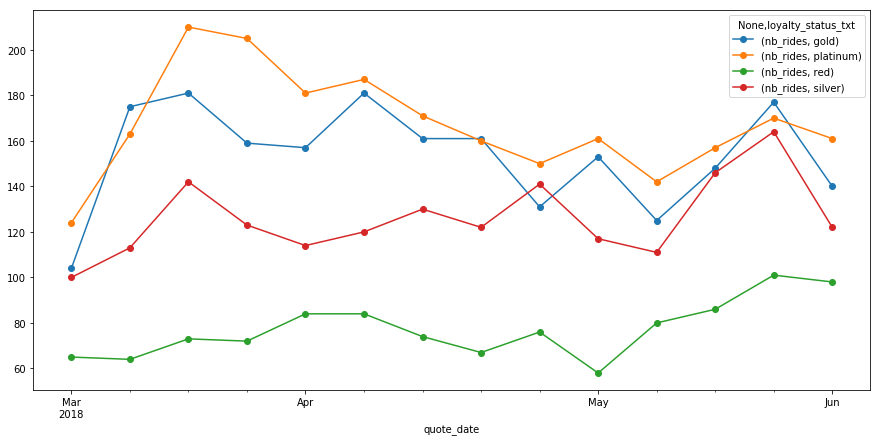

In [98]:
loyalty_status_dict = {
    0:"red", 1:"silver", 2:"gold", 3:"platinum"
}
    
def completed_rides_by_week_by_loyalty():
    completed_dt = rides_dt[rides_dt['state'].str.strip() == 'completed']
    joined_df = pd.merge(completed_dt, users_dt, on=['user_id'])
    grouper = pd.Grouper(key='quote_date', freq='W-MON')
    frame = joined_df.groupby([grouper, 'loyalty_status_txt'])['ride_id'].count().to_frame()
    return frame.rename(columns = {'ride_id' : 'nb_rides'})
     

fig, ax = plt.subplots(figsize=(15,7))

loyalty = completed_rides_by_week_by_loyalty()
loyalty.unstack().plot(ax=ax, marker='o')

Note:

TODO:
- Question 2: transform basket correctly (remove warning suppression)
- Question 3; transform ride_id
- Question 4: transform ride_id => nb_rides

We could do some refactor:
- refactor question 2-3